In [2]:
#Section 1: Data Generation and Statistical Analysis

# Pleasee import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Simulate A/B test data
n_A = 1000  # Number of users in Group A
n_B = 1000  # Number of users in Group B
conversion_rate_A = 0.12  # Conversion rate for Group A
conversion_rate_B = 0.13  # Conversion rate for Group B

# Generate random data for conversions
conversions_A = np.random.binomial(1, conversion_rate_A, n_A)
conversions_B = np.random.binomial(1, conversion_rate_B, n_B)

# Create a DataFrame to hold the data
data = pd.DataFrame({
    'Group': ['A'] * n_A + ['B'] * n_B,
    'Conversions': np.concatenate([conversions_A, conversions_B])
})

# Please Calculate means and standard deviations
mean_A = data[data['Group'] == 'A']['Conversions'].mean()
mean_B = data[data['Group'] == 'B']['Conversions'].mean()
std_A = data[data['Group'] == 'A']['Conversions'].std()
std_B = data[data['Group'] == 'B']['Conversions'].std()

# Print means and standard deviations
print(f"Mean conversion rate for Group A: {mean_A:.4f}")
print(f"Mean conversion rate for Group B: {mean_B:.4f}")
print(f"Standard Deviation for Group A: {std_A:.4f}")
print(f"Standard Deviation for Group B: {std_B:.4f}")

# Perform t-test
t_stat, p_value = stats.ttest_ind(data[data['Group'] == 'A']['Conversions'], 
                                   data[data['Group'] == 'B']['Conversions'])
alpha = 0.05  # significance level
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Pleases check for significance
if p_value < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")


Mean conversion rate for Group A: 0.1240
Mean conversion rate for Group B: 0.1310
Standard Deviation for Group A: 0.3297
Standard Deviation for Group B: 0.3376
T-statistic: -0.4691, P-value: 0.6391
There is no significant difference between the groups.


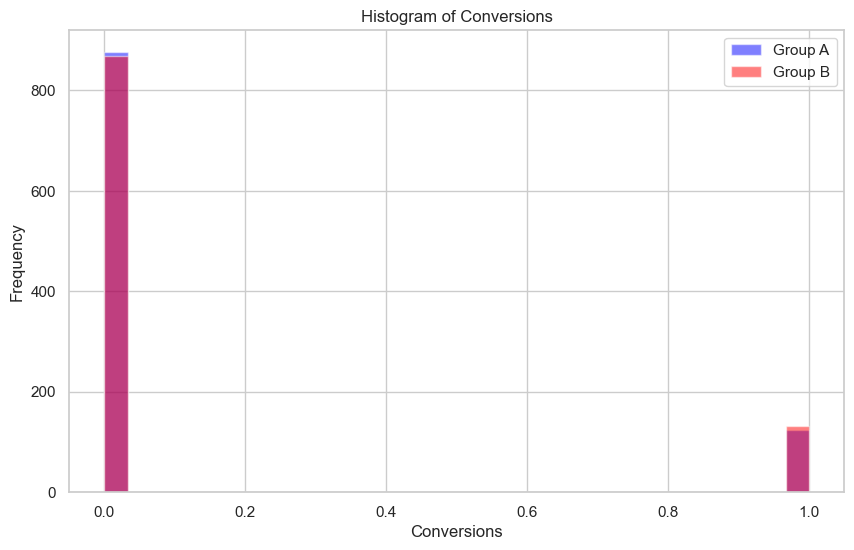

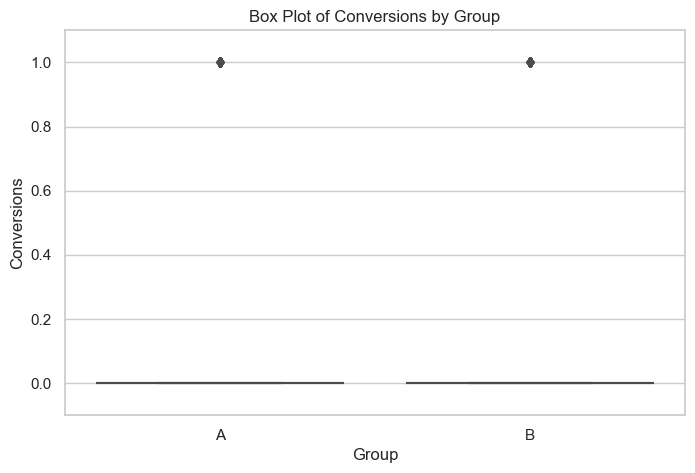

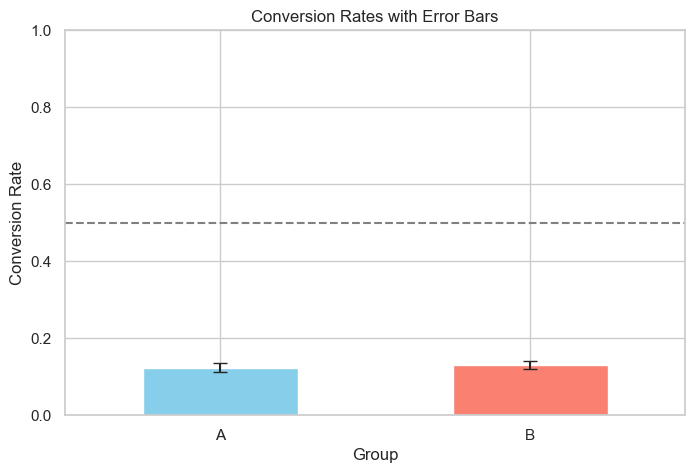

In [3]:
# Section 2: Basic Visualizations

# Please import the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Histogram of conversions for both groups
plt.figure(figsize=(10, 6))
plt.hist(data[data['Group'] == 'A']['Conversions'], bins=30, alpha=0.5, label='Group A', color='blue')
plt.hist(data[data['Group'] == 'B']['Conversions'], bins=30, alpha=0.5, label='Group B', color='red')
plt.title('Histogram of Conversions')
plt.xlabel('Conversions')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. Box plot of conversions for both groups
plt.figure(figsize=(8, 5))
sns.boxplot(x='Group', y='Conversions', data=data)
plt.title('Box Plot of Conversions by Group')
plt.ylabel('Conversions')
plt.ylim(-0.1, 1.1)  # Keep it within bounds
plt.show()

# 3. Bar plot of conversion rates with error bars
conversion_rates = data.groupby('Group')['Conversions'].mean()
std_errors = data.groupby('Group')['Conversions'].std() / np.sqrt(data['Group'].value_counts())

plt.figure(figsize=(8, 5))
conversion_rates.plot(kind='bar', yerr=std_errors, color=['skyblue', 'salmon'], capsize=5)
plt.title('Conversion Rates with Error Bars')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.axhline(y=0.5, color='gray', linestyle='--')  # Example threshold line
plt.show()


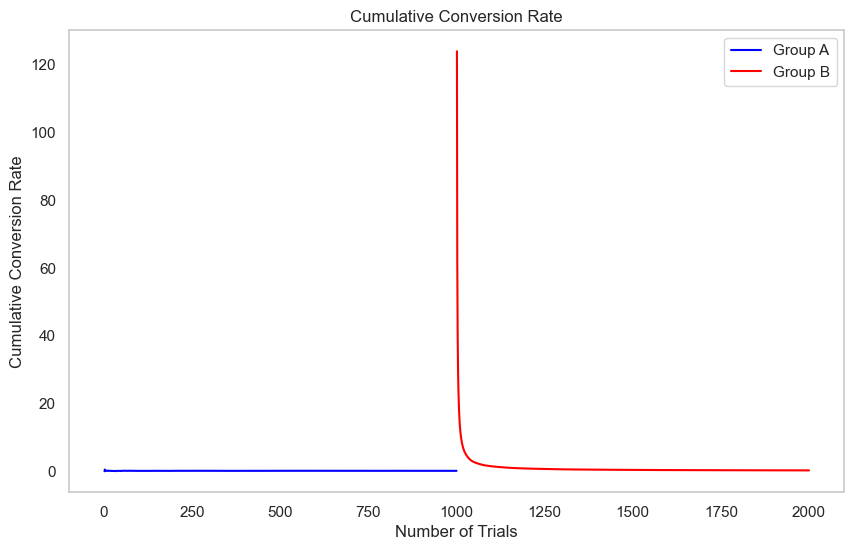

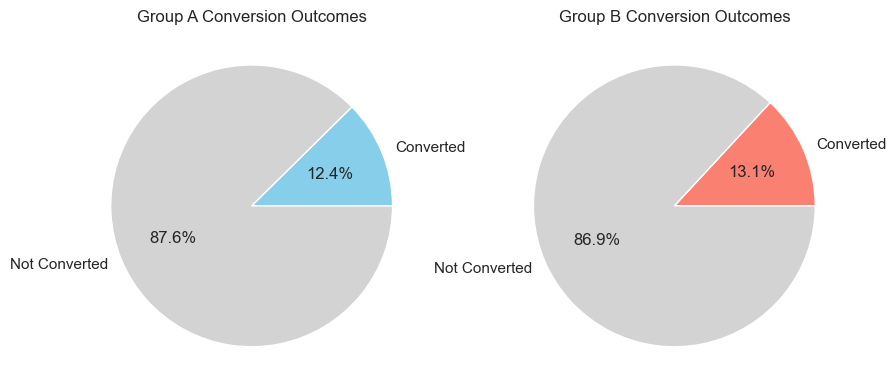

Key Insights:
Group B performed better in terms of conversion.

Summary of Findings:
Mean Conversion Rate A: 0.1240
Mean Conversion Rate B: 0.1310
Statistical Significance: Not Significant


In [4]:
# Section 3: Advanced Visualizations and Insights

# 4. Cumulative conversion rate
data['Cumulative Conversions'] = data['Conversions'].cumsum()
data['Cumulative Trials'] = np.arange(1, len(data) + 1)

plt.figure(figsize=(10, 6))
plt.plot(data[data['Group'] == 'A']['Cumulative Trials'], data[data['Group'] == 'A']['Cumulative Conversions'] / np.arange(1, n_A + 1), label='Group A', color='blue')
plt.plot(data[data['Group'] == 'B']['Cumulative Trials'], data[data['Group'] == 'B']['Cumulative Conversions'] / np.arange(1, n_B + 1), label='Group B', color='red')
plt.title('Cumulative Conversion Rate')
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Conversion Rate')
plt.legend()
plt.grid()
plt.show()

# 5. Pie chart of conversion outcomes
conversion_outcomes_A = [conversions_A.sum(), n_A - conversions_A.sum()]
conversion_outcomes_B = [conversions_B.sum(), n_B - conversions_B.sum()]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(conversion_outcomes_A, labels=['Converted', 'Not Converted'], autopct='%1.1f%%', colors=['skyblue', 'lightgray'])
plt.title('Group A Conversion Outcomes')

plt.subplot(1, 2, 2)
plt.pie(conversion_outcomes_B, labels=['Converted', 'Not Converted'], autopct='%1.1f%%', colors=['salmon', 'lightgray'])
plt.title('Group B Conversion Outcomes')

plt.show()

# Additional Insights
print("Key Insights:")
if mean_A > mean_B:
    print("Group A performed better in terms of conversion.")
elif mean_B > mean_A:
    print("Group B performed better in terms of conversion.")
else:
    print("Both groups performed equally in terms of conversion.")

# Summary of Findings
print("\nSummary of Findings:")
print(f"Mean Conversion Rate A: {mean_A:.4f}")
print(f"Mean Conversion Rate B: {mean_B:.4f}")
print(f"Statistical Significance: {'Significant' if p_value < alpha else 'Not Significant'}")
